Multi Armed Bandit
====

In [1]:
##Gaussian Process Code##

%matplotlib inline
import numpy as np
from sklearn import gaussian_process
import matplotlib.pyplot as plt
from scipy.stats import norm
import heapq


# Here specified the true reward of each machine
def f(x):
    return x*(np.sin(x)+1)

#Inputs are:
#Your initial choice
#Your true value(function)
#Number of machines

def armedbandit(choice,f,m,eps):
    x = np.atleast_2d(np.linspace(0.001, 10, m)).T
    
    # Randomly set initial values to be appended
    point_append_after = 0.5
    point_append_before = 0
    choice2 = list(choice)
    
    X = np.atleast_2d(choice).T
    y = norm.rvs(f(X).ravel(), 1)
    gp = gaussian_process.GaussianProcess(theta0=1e-2, thetaL=1e-4, thetaU=1e-1)
    gp.fit(X, y)
    y_pred, sigma2_pred = gp.predict(x, eval_MSE=True)
    sigma = np.sqrt(sigma2_pred)
    ch = [int(i*m*0.1)-1 for i in choice]
    choice_ = y_pred[ch]
    mu_plus = choice_[np.argmax(choice_)]
    seq = norm.cdf((y_pred - mu_plus-eps)/sigma)
    point_append_after = x[np.argmax(seq)]
    choice.append(point_append_after[0])
    
    # When the points are not changing, stop and return
    #while(point_append_before - point_append_after != 0):
    j = 1
    for i in range(60):

        # The largest reward         
        # Fit Gaussian Process
        X = np.atleast_2d(choice).T
        y_new = norm.rvs(f(choice[-1]), sigma[np.where(x == choice[-1])[0][0]])
        y = np.append(y, y_new) 
        gp = gaussian_process.GaussianProcess(theta0=1e-2, thetaL=1e-4, thetaU=1e-1)
        gp.fit(X, y)
        y_pred, sigma2_pred = gp.predict(x, eval_MSE=True)
        sigma = np.sqrt(sigma2_pred)
        
        ch = [int(i*m*0.1)-1 for i in choice]
        choice_ = y_pred[ch]
        mu_plus = choice_[np.argmax(choice_)]

        fig = plt.figure(figsize=(10, 5))
        plt.plot(x,f(x))
        plt.plot(x, y_pred, 'b-', label=u'Prediction')
        plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
        plt.fill(np.concatenate([x, x[::-1]]),
                np.concatenate([y_pred - 3 * sigma,
                               (y_pred + 3 * sigma)[::-1]]),
                alpha=.5, fc='b', ec='None', label='95% confidence interval')
        #plt.legend(loc='upper left')
        #plt.title("Approximating true function with more data",size=16)
        #if j % 2 == 1:
        #plt.savefig('testplot' + str(j) +'.png')
        j +=1
        plt.close(fig)
        
        point_append_before = point_append_after
        
        seq = norm.cdf((y_pred - mu_plus-eps)/sigma)
        
        #point_append_after = (np.argmax(seq)+1)*10/m
        point_append_after = x[np.argmax(seq)]

        i = 1
        while point_append_after == point_append_before:
            point_append_after = np.array([np.min(heapq.nlargest(i, choice))])
            i = i + 1
            print(i)
        #choice2.append(point_append_after)
        #if point_append_after in choice:
        #    choice.append(choice[-1])
        #    continue
        choice.append(point_append_after[0])

    
        
    # Gaussian Processes in scikit-learn is still under developing, might not be able to return the choice list
    return(choice, y)

In [2]:
m = 10000
choice = [2,9]
machine, reward = armedbandit(choice, f, m,0.01)

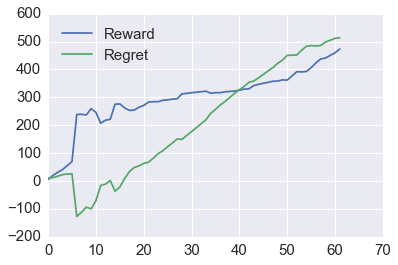

In [3]:
plt.figure()
plt.plot(np.cumsum(reward),label = "Reward")
regret = np.cumsum(f(8) - reward)
plt.plot(regret, label = "Regret")
plt.legend(loc='upper left')
#plt.savefig('reward_regret.png')
pass